# Lab 2 - Correlations Between Fourth Grade MCAS Scores and Various Other Statistics

## Section 1 - code

The three variables most correlated with 4th grade scores (totsc4) are 8th grade score (totsc8), % of students eligible for free/reduced price lunch (lnchpct), and income per capita (percap).
               code      municipa  district  regday    specneed  bilingua  occupday  totday    spc       speced    lnchpct   tchratio  percap    totsc4    totsc8    avgsalary pctel    
 0 code        1.0000    nan       nan       0.0003   -0.0283   -0.0646    0.0360   -0.0033    0.0148   -0.0260    0.0123   -0.0187    0.0295    0.0162    0.0410   -0.0139   -0.0250 
 1 municipa    nan       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan    
 2 district    nan       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan    
 3 regday      0.0003    nan       nan       1.0000    0.4015   -0.0001   

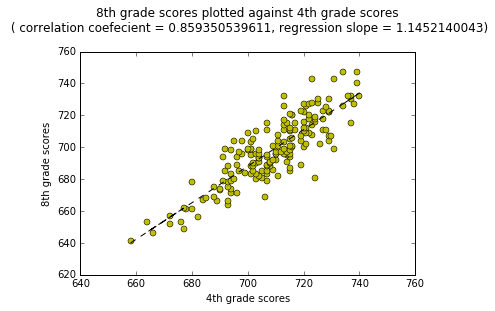

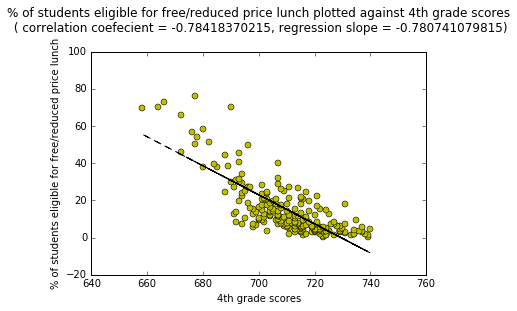

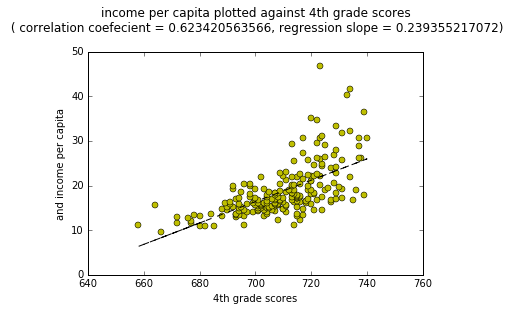

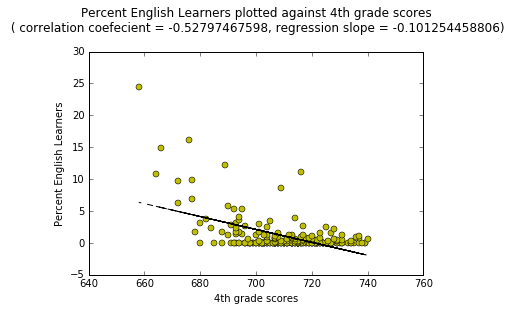

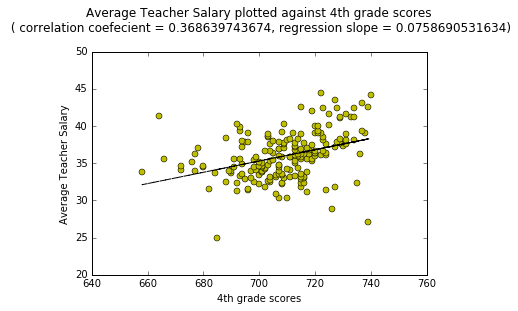

In [5]:
% matplotlib inline
# -*- coding: utf-8 -*-

"""
Created on Mon Feb  8 13:28:23 2016

@author: david
"""
import copy
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import scipy.special as special

#"","price","lotsize","bedrooms","bathrms","stories","driveway","recroom","fullbase","gashw","airco","garagepl","prefarea"

def main():

    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

    #import file, copy and pasted from cats.py (also writen by David M)
    raw_file = open('mcas.csv')

    file_by_line = list()
    for line in raw_file:
        file_by_line.append(line.replace('\n', ''))

    headers = file_by_line.pop(0)
    headers = headers.split(',')

    header_length = 9
    for i in range(len(headers)):
        if len(headers[i]) > header_length:
            headers[i] = headers[i][0:header_length]
        while len(headers[i]) < header_length:
            headers[i] += ' '

    # data array is structured as follows: data[data feild being accessed, n_house]
    data = np.zeros((len(headers), len(file_by_line)), dtype=np.float64)


    for line_n in range(len(file_by_line)):
        line_components = file_by_line[line_n].replace('\"', '').split(',')

        for i in range(len(line_components)):
            try:
                line_data = float(line_components[i])
            except:
                line_data = float('nan')
            data[i][line_n] = line_data


    #first z dimension is z values, second z dimension is p values
    corelation_array = np.zeros([data.shape[0], data.shape[0]], dtype = np.float64)

    for i in range(corelation_array.shape[0]):
        for j in range(corelation_array.shape[1]):
            corelation_array[i][j] = pearsonr_filtered(data[i], data[j])[0]


    print("The three variables most correlated with 4th grade scores (totsc4) are 8th grade score (totsc8), % of "
          "students eligible for free/reduced price lunch (lnchpct), and income per capita (percap).")

    coloring_bound = 0.4
    print(HEADER + "               " + str(headers).replace("', '", ' ').replace("('", '').replace("['", '').replace("']", '') + ENDC)
    for i_num in range(len(corelation_array)):
        if i_num < 10:
            print(' ', end='')
        print(HEADER + str(i_num) + ' ' + headers[i_num] + ENDC, end='')
        i = corelation_array[i_num]
        for j in i:
            if math.isnan(j):
                print(WARNING + '   nan   ' + ENDC, end=' ')
            elif j >= 0:
                if 1.0 > abs(j) > coloring_bound:
                    print(OKGREEN + '   ' + '%.4f' % j + ENDC, end=' ')
                else:
                    print('   ' + '%.4f' % j, end=' ')
            else:
                if 1.0 > abs(j) > coloring_bound:
                    print(OKGREEN + '  ' + '%.4f' % j + ENDC, end=' ')
                else:
                    print('  ' + '%.4f' % j, end=' ')
        print()
    print('\n')

    print("The three variables most corelated with 4th grade scores (totsc4) are 8th grade score (totsc8), "
             "% of students eligible for free/reduced price lunch (lnchpct), and income per capita (percap).")

    #plot totsc8 against totsc4
    # fig1 = plt.figure()
    # ax1 = fig1.add_subplot(111)
    # ax1.scatter(data[14], data[15])
    # # ax1.set_title('8th grade scores plotted against 4th grade scores')
    # ax1.set_xlabel('4th grade scores')
    # ax1.set_ylabel('8th grade scores')

    show_plot(data, 13, 14, "8th grade scores plotted against 4th grade scores", "4th grade scores",
              "8th grade scores", compute_best_fit=True)

    show_plot(data, 13, 10, "% of students eligible for free/reduced price lunch plotted against 4th grade scores",
              "4th grade scores", "% of students eligible for free/reduced price lunch", compute_best_fit=True)

    show_plot(data, 13, 12, "income per capita plotted against 4th grade scores", "4th grade scores",
              "and income per capita", compute_best_fit=True)

    show_plot(data, 13, 16, "Percent English Learners plotted against 4th grade scores", "4th grade scores",
              "Percent English Learners", compute_best_fit=True)

    show_plot(data, 13, 15, "Average Teacher Salary plotted against 4th grade scores", "4th grade scores",
              "Average Teacher Salary", compute_best_fit=True)


    plt.show()

def show_plot(data_array, index_x, index_y, title, x_title, y_title, compute_best_fit=False):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.scatter(data_array[index_x], data_array[index_y])

    if compute_best_fit:
        sorted = list()
        for i in range(data_array.shape[1]):
            if not (math.isnan(data_array[index_x][i]) or math.isnan(data_array[index_y][i])):
                sorted.append([data_array[index_x][i], data_array[index_y][i]])

        #this line comes from Stephen on stack exchange (http://stackoverflow.com/questions/3121979/how-to-sort-list-tuple-of-lists-tuples)
        sorted.sort(key=lambda tup: tup[1])

        x = list()
        y = list()
        for i in sorted:
            x.append(i[0])
            y.append(i[1])

        # the next 3 lines come from DSM on stack exchange (http://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy)
        fit = np.polyfit(x, y, 1)
        fit_fn = np.poly1d(fit)
        plt.plot(x, y, 'yo', x, fit_fn(x), '--k')

        ax1.set_title(title + '\n ( correlation coefecient = ' + str(pearsonr_filtered(data_array[index_x], data_array[index_y])[0])
                      + ', regression slope = ' + str(fit_fn[1]) + ')\n')

    else:
        ax1.set_title(title + ')\n')
    ax1.set_xlabel(x_title)
    ax1.set_ylabel(y_title)



def pearsonr_filtered(x, y):
    # remove any nan values from x and y
    x = list(copy.deepcopy(x))
    y = list(copy.deepcopy(y))

    # a while loop is used instead of a for loop because the list of x changes during loop execution
    i = 0
    while i < len(x):
        if math.isnan(x[i]) or math.isnan(y[i]):
            x.pop(i)
            y.pop(i)
            i -= 1
        i += 1

    if not len(x) > 0:
        return math.nan, math.nan
    return stats.pearsonr(x, y)
    

if __name__ == '__main__':
    main()

## Section 2 - Analysis

The three variables most correlated with 4th grade scores (totsc4) are 8th grade score (totsc8), % of students eligible for free/reduced price lunch (lnchpct), and income per capita (percap). Totsc8 and lnchpct were both strongly correlated (r > 0.7) (Calkins) while percap and Percent English Learners (pctel) were both moderately correlated (r > 0.5) (Calkins). Average Teacher Salary (avgsalry) had low correlation (r > 0.3) (Calkins). The other variables compared had little to no correlation with 4th grade scores.

It doesn’t come as any surprise that totsc8 and lnchpct were both highly correlated with totsc4. It would make sense that a student who did well on a fourth grade standardized test would also do well on an 8th grade standardized test. We don’t know why they did well, it could be that their parents particularly valued education, maybe they were particularly skilled test takers, or maybe they really enjoyed school. We don’t know why those particular students did well, but it makes sense that they did well on both tests. It also makes sense that districts with a high number of students on reduced price lunch programs would do worse at standardized tests. Districts in low income areas often receive less funding than districts in high income areas because of school funding via local levy (something that’s been in the Washington news lately).

I expected income per capita (percap) to be more closely correlated with test scores, but it’s correlation coefficient is only 0.672 (compared to -0.78 for lnchpct). This might mean that once a family rises above the poverty line additional income makes little difference. After all, money can only buy so many tutors. 

It also makes sense that the Percent English Learners (pctel) is moderately correlated with 4th grade standardized tests. Fourth graders who don’t speak English as their first language will probably have more trouble understanding questions on the standardized test than native English speakers.

Correlation coefficients were calculated using the function pearsonr(x, y) from the scipy.stats package (distributed under anaconda 3 2.5.0). Scipy’s implementation of pearsonr also returns a p value, but it was disregarded in this study.

Citations:
Calkins, Keith G. "Correlation Coefficients." Correlation Coefficients. Andrews University, 18 July 2005. Web. 19 Feb. 2016.
